In [1]:
from thesiscode.plotting import Plot
from thesiscode.quality import Data, read_gator_2mass_matched, match_data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import itertools

In [2]:
font = {'family' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10)
matplotlib.rcParams["ps.useafm"] = True
matplotlib.rcParams["pdf.use14corefonts"] = True
matplotlib.rcParams["text.usetex"] = True


In [18]:
def three_cell_plot(x1, x2, x3, y1, y2, y3, xlabel=None, xlims=None, ylabel=None, ylims=None, txt1=None, txt2=None, txt3=None, inverted=False):
    colors = ["b","r","g","y","purple","orange","black"]
    
    fig = plt.figure(figsize=(6,6))
    fig.subplots_adjust(left=0.1, right=0.95, top=0.95, bottom=0.1, wspace=0, hspace=0)

    ax = plt.subplot(221)
    for ii in range(len(x1)):
        ax.scatter(x1[ii], y1[ii], c=colors[ii], s=1, edgecolor="None")
    if txt1:
        ax.text(0.9, 0.9, txt1, transform=ax.transAxes, horizontalalignment="right")
    ax.set_xlim(xlims[0], xlims[1])
    ax.set_ylim(ylims[0], ylims[1])
    ax.set_ylabel(ylabel)
    if inverted:
        ax.invert_yaxis()
    ax.get_xaxis().set_visible(False)
    ax.minorticks_on()

    ax = plt.subplot(223)
    for ii in range(len(x2)):
        ax.scatter(x2[ii], y2[ii], c=colors[ii], s=1, edgecolor="None")
    if txt2:
        ax.text(0.9, 0.9, txt2, transform=ax.transAxes, horizontalalignment="right")
    ax.set_xlim(xlims[0], xlims[1])
    ax.set_ylim(ylims[0], ylims[1])
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if inverted:
        ax.invert_yaxis()
    ax.minorticks_on()

    ax = plt.subplot(224)
    for ii in range(len(x3)):
        ax.scatter(x3[ii], y3[ii], c=colors[ii], s=1, edgecolor="None")
    if txt3:
        ax.text(0.9, 0.9, txt3, transform=ax.transAxes, horizontalalignment="right")
    ax.set_xlim(xlims[0], xlims[1])
    ax.set_ylim(ylims[0], ylims[1])
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.get_yaxis().set_visible(False)
    if inverted:
        ax.invert_yaxis()
    ax.minorticks_on()
    plt.show()

In [3]:
## Match OGLE and 2MASS
ogle = pd.read_csv("../samples/ogle_table.dat", sep="|")
ogle_2mass = read_gator_2mass_matched("../samples/ogle_2mass_match.tbl", "2mass")
ogle_matched = Data(match_data(ogle, ogle_2mass))
ogle_matched.data["colvi"] = ogle_matched.data.V - ogle_matched.data.I

ogle_matched.data.Field[ogle_matched.data.glon > 290] = "smc"
ogle_matched.data.Field[ogle_matched.data.glon < 290] = "lmc"
lmc = ogle_matched.data.Field == "lmc"

ogle_matched.cut_me(lmc, cutstr="Selecting only LMC objects")
ogle_matched.cut_me(ogle_matched.data.I > 12.5, cutstr="Enforcing OGLE saturation")

## Match OGLE and WISE-2MASS
ogle_wise = pd.read_csv("../samples/ogle_allwise_allmatches.dat", sep="|")
ogle_wise = Data(ogle_wise)
ogle_wise.data["colvi"] = ogle_wise.data.V - ogle_wise.data.I
ogle_wise.data["coljk"] = ogle_wise.data.jmag - ogle_wise.data.kmag
ogle_wise.data["col12"] = ogle_wise.data.w1 - ogle_wise.data.w2
ogle_wise.data["col23"] = ogle_wise.data.w2 - ogle_wise.data.w3

ogle_wise.data.Field[ogle_wise.data.glon > 290] = "smc"
ogle_wise.data.Field[ogle_wise.data.glon < 290] = "lmc"
lmc = ogle_wise.data.Field == "lmc"

ogle_wise.clean_me(faint=False, saturated=False, ccflag=False, snr=1, extflg=5)
ogle_wise.cut_me(lmc, cutstr="Selecting only LMC objects")
ogle_wise.cut_me(ogle_wise.data.I > 12.5, cutstr="Enforcing OGLE saturation")

/Users/Nick/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Nick/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [5]:
cut1 = (ogle_matched.data.Spectr == "O-rich") & (ogle_matched.data.Type == "OSARG")
cut2 = (ogle_matched.data.Spectr == "C-rich") & (ogle_matched.data.Type == "OSARG")
cut3 = (ogle_matched.data.Spectr == "O-rich") & (ogle_matched.data.Type == "Mira")
cut4 = (ogle_matched.data.Spectr == "C-rich") & (ogle_matched.data.Type == "Mira")
cut5 = (ogle_matched.data.Spectr == "O-rich") & (ogle_matched.data.Type == "SRV")
cut6 = (ogle_matched.data.Spectr == "C-rich") & (ogle_matched.data.Type == "SRV")


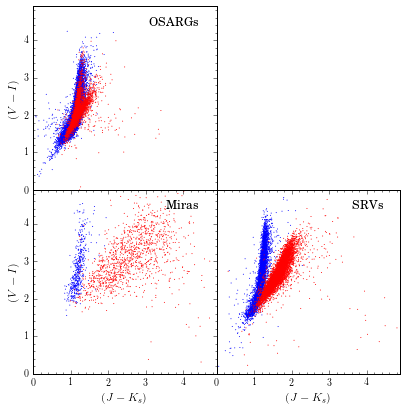

In [6]:
x1 = [ogle_matched.data.coljk[cut1], ogle_matched.data.coljk[cut2]]
x2 = [ogle_matched.data.coljk[cut3], ogle_matched.data.coljk[cut4]]
x3 = [ogle_matched.data.coljk[cut5], ogle_matched.data.coljk[cut6]]

y1 = [ogle_matched.data.colvi[cut1], ogle_matched.data.colvi[cut2]]
y2 = [ogle_matched.data.colvi[cut3], ogle_matched.data.colvi[cut4]]
y3 = [ogle_matched.data.colvi[cut5], ogle_matched.data.colvi[cut6]]

three_cell_plot(x1, x2, x3, y1, y2, y3, xlabel="$(J-K_s)$", ylabel="$(V-I)$", 
                ylims=(0,4.9), xlims=(0,4.9), txt1="OSARGs", txt2="Miras", txt3="SRVs")


/Users/Nick/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Nick/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [16]:
cut1 = (ogle_wise.data.Spectr == "O-rich") & (ogle_wise.data.Type == "OSARG")
cut2 = (ogle_wise.data.Spectr == "C-rich") & (ogle_wise.data.Type == "OSARG")
cut3 = (ogle_wise.data.Spectr == "O-rich") & (ogle_wise.data.Type == "Mira")
cut4 = (ogle_wise.data.Spectr == "C-rich") & (ogle_wise.data.Type == "Mira")
cut5 = (ogle_wise.data.Spectr == "O-rich") & (ogle_wise.data.Type == "SRV")
cut6 = (ogle_wise.data.Spectr == "C-rich") & (ogle_wise.data.Type == "SRV")

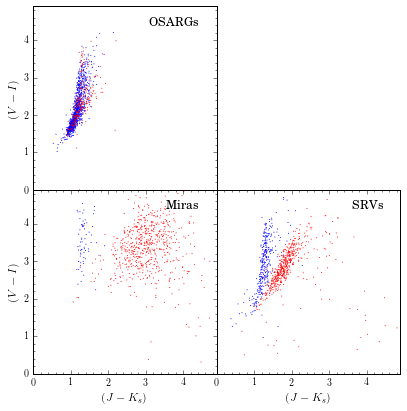

In [17]:
x1 = [ogle_wise.data.coljk[cut1], ogle_wise.data.coljk[cut2]]
x2 = [ogle_wise.data.coljk[cut3], ogle_wise.data.coljk[cut4]]
x3 = [ogle_wise.data.coljk[cut5], ogle_wise.data.coljk[cut6]]

y1 = [ogle_wise.data.colvi[cut1], ogle_wise.data.colvi[cut2]]
y2 = [ogle_wise.data.colvi[cut3], ogle_wise.data.colvi[cut4]]
y3 = [ogle_wise.data.colvi[cut5], ogle_wise.data.colvi[cut6]]

three_cell_plot(x1, x2, x3, y1, y2, y3, xlabel="$(J-K_s)$", ylabel="$(V-I)$", 
                ylims=(0,4.9), xlims=(0,4.9), txt1="OSARGs", txt2="Miras", txt3="SRVs")


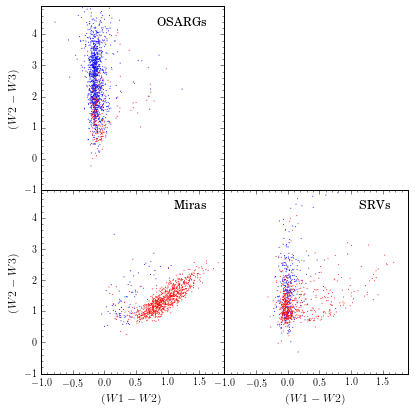

In [10]:
x1 = [ogle_wise.data.col12[cut1], ogle_wise.data.col12[cut2]]
x2 = [ogle_wise.data.col12[cut3], ogle_wise.data.col12[cut4]]
x3 = [ogle_wise.data.col12[cut5], ogle_wise.data.col12[cut6]]

y1 = [ogle_wise.data.col23[cut1], ogle_wise.data.col23[cut2]]
y2 = [ogle_wise.data.col23[cut3], ogle_wise.data.col23[cut4]]
y3 = [ogle_wise.data.col23[cut5], ogle_wise.data.col23[cut6]]

three_cell_plot(x1, x2, x3, y1, y2, y3, xlabel="$(W1-W2)$", ylabel="$(W2-W3)$", 
                ylims=(-1,4.9), xlims=(-1, 1.9), txt1="OSARGs", txt2="Miras", txt3="SRVs")


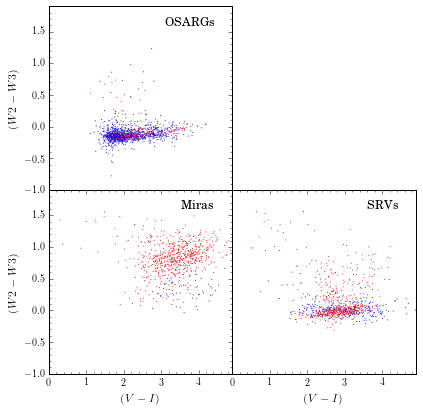

In [11]:
x1 = [ogle_wise.data.colvi[cut1], ogle_wise.data.colvi[cut2]]
x2 = [ogle_wise.data.colvi[cut3], ogle_wise.data.colvi[cut4]]
x3 = [ogle_wise.data.colvi[cut5], ogle_wise.data.colvi[cut6]]

y1 = [ogle_wise.data.col12[cut1], ogle_wise.data.col12[cut2]]
y2 = [ogle_wise.data.col12[cut3], ogle_wise.data.col12[cut4]]
y3 = [ogle_wise.data.col12[cut5], ogle_wise.data.col12[cut6]]

three_cell_plot(x1, x2, x3, y1, y2, y3, xlabel="$(V-I)$", ylabel="$(W2-W3)$", 
                ylims=(-1,1.9), xlims=(0, 4.9), txt1="OSARGs", txt2="Miras", txt3="SRVs")


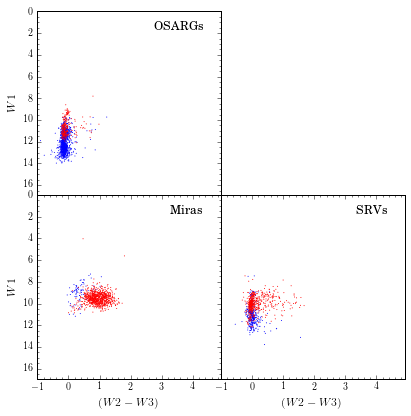

In [22]:
x1 = [ogle_wise.data.col12[cut1], ogle_wise.data.col12[cut2]]
x2 = [ogle_wise.data.col12[cut3], ogle_wise.data.col12[cut4]]
x3 = [ogle_wise.data.col12[cut5], ogle_wise.data.col12[cut6]]

y1 = [ogle_wise.data.w1[cut1], ogle_wise.data.w1[cut2]]
y2 = [ogle_wise.data.w1[cut3], ogle_wise.data.w1[cut4]]
y3 = [ogle_wise.data.w1[cut5], ogle_wise.data.w1[cut6]]

three_cell_plot(x1, x2, x3, y1, y2, y3, xlabel="$(W2-W3)$", ylabel="$W1$", 
                ylims=(0,16.9), xlims=(-1, 4.9), txt1="OSARGs", txt2="Miras", txt3="SRVs", inverted=True)


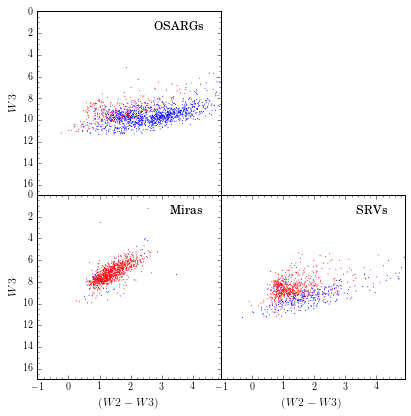

In [23]:
x1 = [ogle_wise.data.col23[cut1], ogle_wise.data.col23[cut2]]
x2 = [ogle_wise.data.col23[cut3], ogle_wise.data.col23[cut4]]
x3 = [ogle_wise.data.col23[cut5], ogle_wise.data.col23[cut6]]

y1 = [ogle_wise.data.w3[cut1], ogle_wise.data.w3[cut2]]
y2 = [ogle_wise.data.w3[cut3], ogle_wise.data.w3[cut4]]
y3 = [ogle_wise.data.w3[cut5], ogle_wise.data.w3[cut6]]

three_cell_plot(x1, x2, x3, y1, y2, y3, xlabel="$(W2-W3)$", ylabel="$W3$", 
                ylims=(0,16.9), xlims=(-1, 4.9), txt1="OSARGs", txt2="Miras", txt3="SRVs", inverted=True)
